In [10]:

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import time
import random
import scipy.stats as stats
from scipy.sparse import *
from visualizingData import *
from clipping import *
from other import *
import os

In [2]:
# Load the data from the specified .npz file
file = np.load(".\\FTICR.npz", allow_pickle=True)

# # Extract the necessary components from the file
print(file.files)

selected_B = file['selected_B'][()]
shape = file['shape'][()]
mz_values = file['mz'][()]



['selected_B', 'shape', 'mz']


In [3]:
selected_B.shape

(400, 1372421)

In [4]:
massbins = find_massbins(dense_matrix=selected_B)

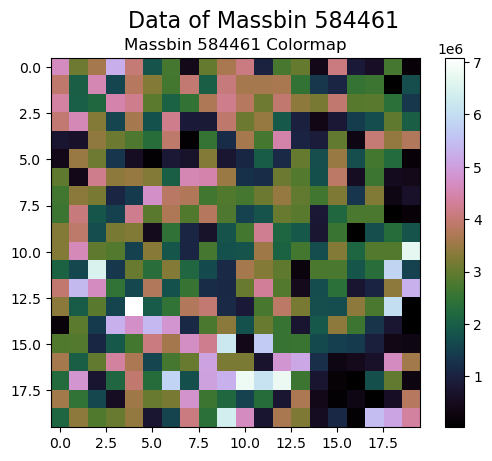

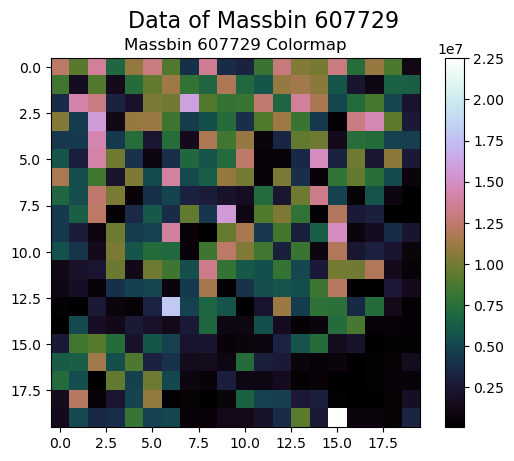

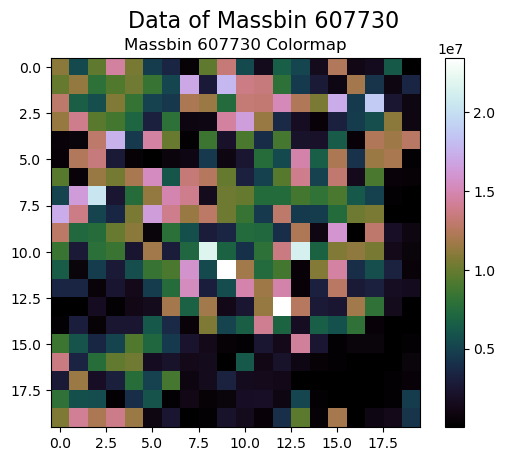

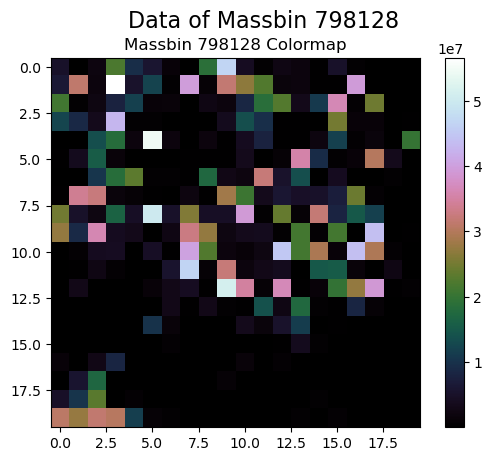

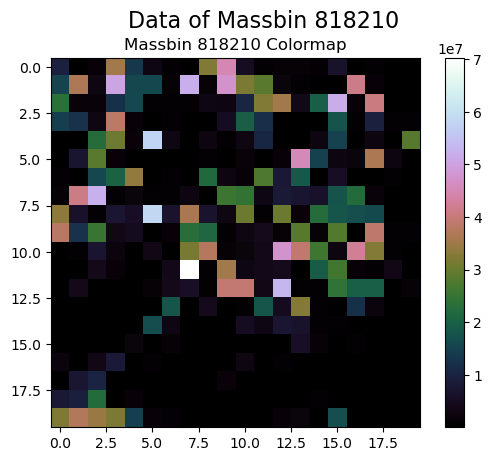

In [5]:
top_massbins = massbins[37:]
for mz in top_massbins:
    visualizeMassBin(dense_matrix=selected_B, massbin=mz, shape=(20,20))
    

In [6]:
uniform_keep_ratios = np.array([9,8,7,6,5,4,3,2])/10
threshold_keep_ratios = keep_small_percentage(uniform_keep_ratios)

In [7]:
selected_B_clipped = []

for i in range(len(uniform_keep_ratios)):
    
    print(f'uni = {uniform_keep_ratios[i]*100}')
    print(f'clipped = {threshold_keep_ratios[i]*100}\n')
    clipped_sel_B =  partlyDiscardedClipping(selected_B, uniform_ratio_keep=uniform_keep_ratios[i], threshold_ratio_keep=threshold_keep_ratios[i])
    zeroCalculator(clipped_sel_B)
    selected_B_clipped.append(clipped_sel_B)
    
    

uni = 90.0
clipped = 11.111111111111112

So, 10.000532271074254% are non-zero indices
 This means that 494068638 indices of 548968400 are zero
uni = 80.0
clipped = 12.5

So, 10.00058127207322% are non-zero indices
 This means that 494068369 indices of 548968400 are zero
uni = 70.0
clipped = 14.285714285714288

So, 9.999926953901172% are non-zero indices
 This means that 494071961 indices of 548968400 are zero
uni = 60.0
clipped = 16.666666666666668

So, 10.00093575513636% are non-zero indices
 This means that 494066423 indices of 548968400 are zero
uni = 50.0
clipped = 20.0

So, 10.000131701569709% are non-zero indices
 This means that 494070837 indices of 548968400 are zero
uni = 40.0
clipped = 25.0

So, 10.00028526232111% are non-zero indices
 This means that 494069994 indices of 548968400 are zero
uni = 30.0
clipped = 33.333333333333336

So, 10.000737018742791% are non-zero indices
 This means that 494067514 indices of 548968400 are zero
uni = 20.0
clipped = 50.0

So, 10.00046396113

In [8]:

# Define the folder name where you want to save the files
save_folder = "fticr_data_clippings"  # Replace with any folder name you'd like

# Create the folder in the same directory as the script, if it doesn't exist
os.makedirs(save_folder, exist_ok=True)

In [9]:
i = 0
for sel_clip in selected_B_clipped:
    csc = csc_matrix(sel_clip)
    np.save(os.path.join(save_folder, f'FTICR_{i}_uni{round(100*uniform_keep_ratios[i])}_cli{round(100*threshold_keep_ratios[i])}.npy'), csc )
    
    i +=1
    
    
    
    